# Imports

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import (cross_val_score, GridSearchCV)
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             classification_report)

np.random.seed(23)

In [3]:
X_train = pd.read_csv('Data/x_train_processed.csv')
X_test = pd.read_csv('Data/x_test_processed.csv')
y_train = pd.read_csv('Data/y_train_processed.csv')
y_test = pd.read_csv('Data/y_test_processed.csv')

In [4]:
print(X_train.shape, '\n', 
      y_train.shape, '\n', 
      X_test.shape, '\n', 
      y_test.shape)

(20557, 20) 
 (20557, 1) 
 (5140, 20) 
 (5140, 1)


# Logistic Regression Model

In [8]:
logreg_params = {'penalty': ['l1', 'l2'], 
                 'solver': ['liblinear', 'saga'],
                }

logreg_gridsearch = GridSearchCV(LogisticRegression(), 
                                 logreg_params, 
                                 cv=5, 
                                 n_jobs=-1)

logreg_gridsearch.fit(X_train, y_train.values.ravel())

print(logreg_gridsearch.best_estimator_)
print(logreg_gridsearch.best_params_)

print('\nBaseline: 55%')

print('\nBest Score:', round(logreg_gridsearch.best_score_, 4))
print('Test Score:', round(logreg_gridsearch.score(X_test, y_test.values.ravel()), 4))

LogisticRegression(penalty='l1', solver='saga')
{'penalty': 'l1', 'solver': 'saga'}

Baseline: 55%

Best Score: 0.6133
Test Score: 0.6111


# Cross Val

In [10]:
logreg = LogisticRegression(max_iter=50000, 
                            penalty='l1', 
                            random_state=73, 
                            solver='liblinear')

logreg.fit(X_train, y_train.values.ravel())

train_scores = cross_val_score(logreg, X_train, y_train.values.ravel())
test_scores = cross_val_score(logreg, X_test, y_test.values.ravel())

print('Baseline: 55%\n')

print('Train scores:', train_scores)
print('Mean:', round(train_scores.mean(), 3))
print('Stdev:', round(2 * train_scores.std(), 3), '\n')

print('Test scores:', test_scores)
print('Mean:', round(test_scores.mean(), 3))
print('Stdev:', round(2 * test_scores.std(), 3), '\n')

Baseline: 55%

Train scores: [0.60797665 0.61527237 0.61177329 0.61444904 0.61663829]
Mean: 0.613
Stdev: 0.006 

Test scores: [0.60700389 0.60311284 0.61575875 0.60019455 0.60505837]
Mean: 0.606
Stdev: 0.011 



# Coefficient Interpretation

In [20]:
logreg_coefs_0 = pd.DataFrame(list(zip(X_train.columns, np.expm1(logreg.coef_[0]))), 
                           columns=['features', 'coef'])

logreg_coefs_0['abs'] = abs(logreg_coefs_0['coef'])

logreg_coefs_0.sort_values('abs', ascending=False).head(10)

,features,coef,abs
2,combined_shot_type_Dunk,0.598433,0.598433
3,combined_shot_type_Jump_Shot,-0.156243,0.156243
19,shot_distance,-0.130305,0.130305
5,shot_type_3PT_Field_Goal,-0.060304,0.060304
1,period,-0.053639,0.053639
0,minutes_remaining,0.044301,0.044301
10,year_2009,0.032707,0.032707
16,opponent_MIL,-0.030585,0.030585
8,year_2004,-0.029788,0.029788
17,opponent_NYK,0.027477,0.027477


# Metrics

              precision    recall  f1-score   support

      Missed       0.61      0.84      0.70      2833
        Made       0.63      0.33      0.43      2307

    accuracy                           0.61      5140
   macro avg       0.62      0.59      0.57      5140
weighted avg       0.62      0.61      0.58      5140



''

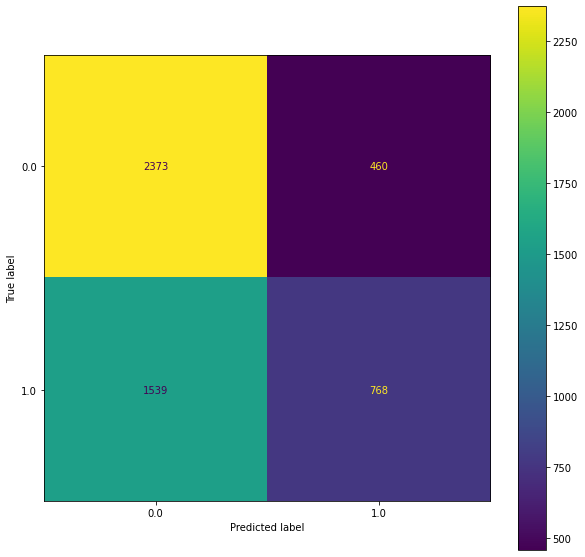

In [22]:
conmat = np.array(confusion_matrix(y_test, 
                                   logreg.predict(X_test), 
                                   labels=[0, 1]))

print(classification_report(y_test,
                            logreg.predict(X_test), 
                            target_names=['Missed', 'Made']))

matrix_display = ConfusionMatrixDisplay(confusion_matrix=conmat, 
                                        display_labels=logreg.classes_)
matrix_display.plot()

figure = plt.gcf()
figure.set_size_inches(10, 10)
;

# Analysis

- The Logistic Regression model was overall 61% accurate in predicting the Target Class - "Shot Made"
- This is 6% better than the baseline model of 55% (majority class: "Shit Missed"
- The features with the largest coefficients 
    - `combined_shot_type_Dunk`
    - `combined_shot_type_Jump_Shot`
    - `shot_distance`
    - `shot_type_3PT_Field_Goal`
    - `minutes_remaining`
- This Logistic Regression model had the same accuracy in predicting the target class as the Random Forest model. Both models had similar "important features". 